<a href="https://colab.research.google.com/github/julianeugarten/FSNNA2023/blob/main/workshop_top2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Workshop Introduction

This notebook explores the usefulness of Top2Vec topic modeling for exploring the MythFic corpus of 5.000+ works of English-language fanfiction about Greek Myth from the Archive of Our Own.

I created a topic model which took each individual story as a doc as imput. However, I removed the 200 shortest and 200 longest stories from my dataset, so most stories under 100 words and stories over 25000 words were disregarded. The model has a manageable number of topics, which you can explore in this notebook.

Content warning: topics are an approximate representation of what in the corpus. That includes sex, violence and other subject matter some readers may want to avoid.


## Quick introduction to notebooks

Notebooks have two types of cells: text and code. Text cells look like what you're reading right now. Code cells  are grey and have an empty bracket next to them on the lefthand side: [ ]. To execute the code in the cell, click this bracket, which will turn into an arrow.


**Make sure you always execute cells in the order in which they are given.**

## Getting Started

First, you need to give this notebook permission to access your Google Drive, where the model is stored. Do that by running the code below.

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Next, install Top2Vec and some of the other software required to explore the model.

In [4]:
!pip install numpy==1.24.3
!pip install numba==0.57.0
!pip install top2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 18.5 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 46.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.9 MB/s eta 

Now go to the dropdown menu at the top of your screen, click on:

Runtime -> Restart runtime -> Yes

Then continue by importing the necessary packages in the cell below.

In [1]:
import numpy as np
import pandas as pd
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
from PIL import Image
import top2vec
from top2vec import Top2Vec

Now run the cell below to load the model.

You probably need to change some of the words between quotation marks:'/content/drive/My Drive/Top2Vec/cleanmodel' is the path to where the model is stored on my Google Drive. In yours, it might be something else, depending on where you unzipped the files I shared with you.

In [2]:
model = Top2Vec.load('/content/drive/My Drive/Top2Vec/cleanmodel')

Now check how many topics are in the model by running the cell below.

In [3]:
model.get_num_topics()

44

Spoilers: The output for this cell should be '44'. That means the topic model consists of 44 topics, and it also means you've installed everything correctly. Good job!

## Exploring the Topics


As discussed in the presentation, topics consist of words.
You can get the topic model to show you the words in any topic.
Let's start with the top 20. You can also change the number from 20 to something else to see the words in any topics.

In [ ]:
model.get_topics(20)

(array([['persephone', 'demeter', 'spring', 'flowers', 'pomegranate',
         'underworld', 'seeds', 'bloom', 'kore', 'hades', 'withered',
         'fields', 'grow', 'fruit', 'maiden', 'pomegranates', 'earth',
         'springtime', 'harvest', 'realm', 'plants', 'flower', 'winter',
         'wheat', 'blooms', 'barren', 'wither', 'soil', 'blossoms',
         'blossom', 'bloomed', 'blooming', 'husband', 'petals',
         'asphodels', 'asphodel', 'domain', 'wilting', 'fruits', 'summer',
         'mortals', 'wilt', 'mother', 'harvests', 'ripe', 'her',
         'gardens', 'leaves', 'garden', 'crops'],
        ['mewled', 'hips', 'sweetness', 'thighs', 'bucked', 'arousal',
         'quivered', 'clit', 'moaned', 'climax', 'asscheeks', 'pussy',
         'climaxed', 'orgasm', 'thrusted', 'pleasure', 'cock', 'wetness',
         'purred', 'slid', 'moan', 'breasts', 'stroked', 'thrust',
         'labia', 'lips', 'swollen', 'tongue', 'sliding', 'keened',
         'bucking', 'slick', 'pulsed', 'min

What do you notice? Do the topics have internal coherence?

## Topic Sizes

We might want to know something about topic sizes: how many documents relate to each topic? It is also possible to find the specific stories that relate most strongly to a topic, but for ethical reasons I have not included that possibility here. I don't have permission from each individual fanfic-author to share their work outside of AO3.


In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()
for topic_size, topic_num in zip(topic_sizes[:45], topic_nums[:45]):
    print(f"Topic Num {topic_num} has {topic_size} documents.")

Topic Num 0 has 535 documents.
Topic Num 1 has 360 documents.
Topic Num 2 has 301 documents.
Topic Num 3 has 279 documents.
Topic Num 4 has 223 documents.
Topic Num 5 has 215 documents.
Topic Num 6 has 203 documents.
Topic Num 7 has 174 documents.
Topic Num 8 has 166 documents.
Topic Num 9 has 159 documents.
Topic Num 10 has 158 documents.
Topic Num 11 has 158 documents.
Topic Num 12 has 125 documents.
Topic Num 13 has 124 documents.
Topic Num 14 has 120 documents.
Topic Num 15 has 119 documents.
Topic Num 16 has 113 documents.
Topic Num 17 has 113 documents.
Topic Num 18 has 112 documents.
Topic Num 19 has 110 documents.
Topic Num 20 has 99 documents.
Topic Num 21 has 92 documents.
Topic Num 22 has 88 documents.
Topic Num 23 has 76 documents.
Topic Num 24 has 75 documents.
Topic Num 25 has 70 documents.
Topic Num 26 has 62 documents.
Topic Num 27 has 61 documents.
Topic Num 28 has 53 documents.
Topic Num 29 has 51 documents.
Topic Num 30 has 51 documents.
Topic Num 31 has 50 documents

## Wordclouds

Most interestingly, it's possible to visualize the words in a given topic. Run the cell below.

It gives you a wordcloud for topic number 27, which I think is about Good Omens and Supernatural. Just like before, you can change the number in the cell below to get a visualization of a different topic.

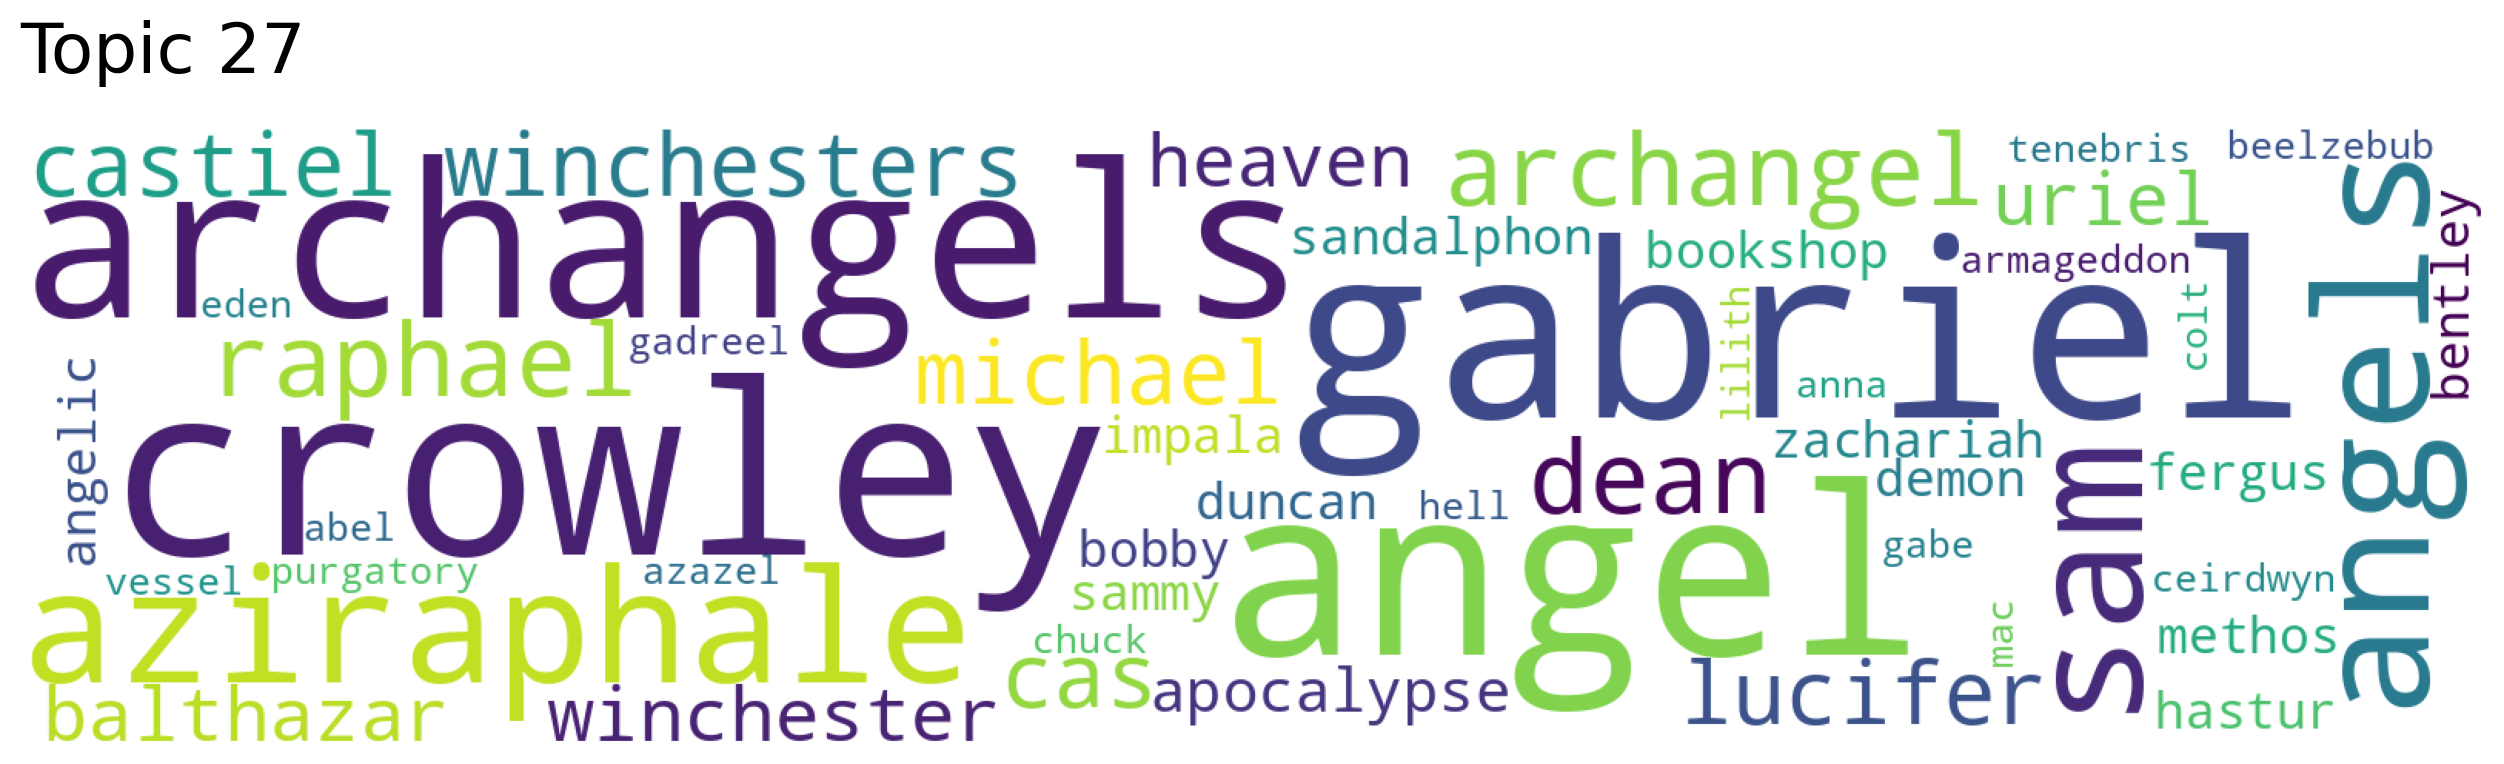

In [ ]:
model.generate_topic_wordcloud(27, background_color="white")

## Keyword Search

Finally, you can search topics relating to a specific keyword, then visualize these topics as word clouds as well.

For example, if you run this code you get visualizations of topics related to 'woman', we can see that topics 11, 2, 34, 10 and 12 represent different aspects of 'woman' present in the dataset.

Please note that I explicitly asked for five topics, so 'woman' may be present in more topics or it may be not very present in some of these five. Once again, you can change the keyword and re-run te cell to find topics related to other keywords.

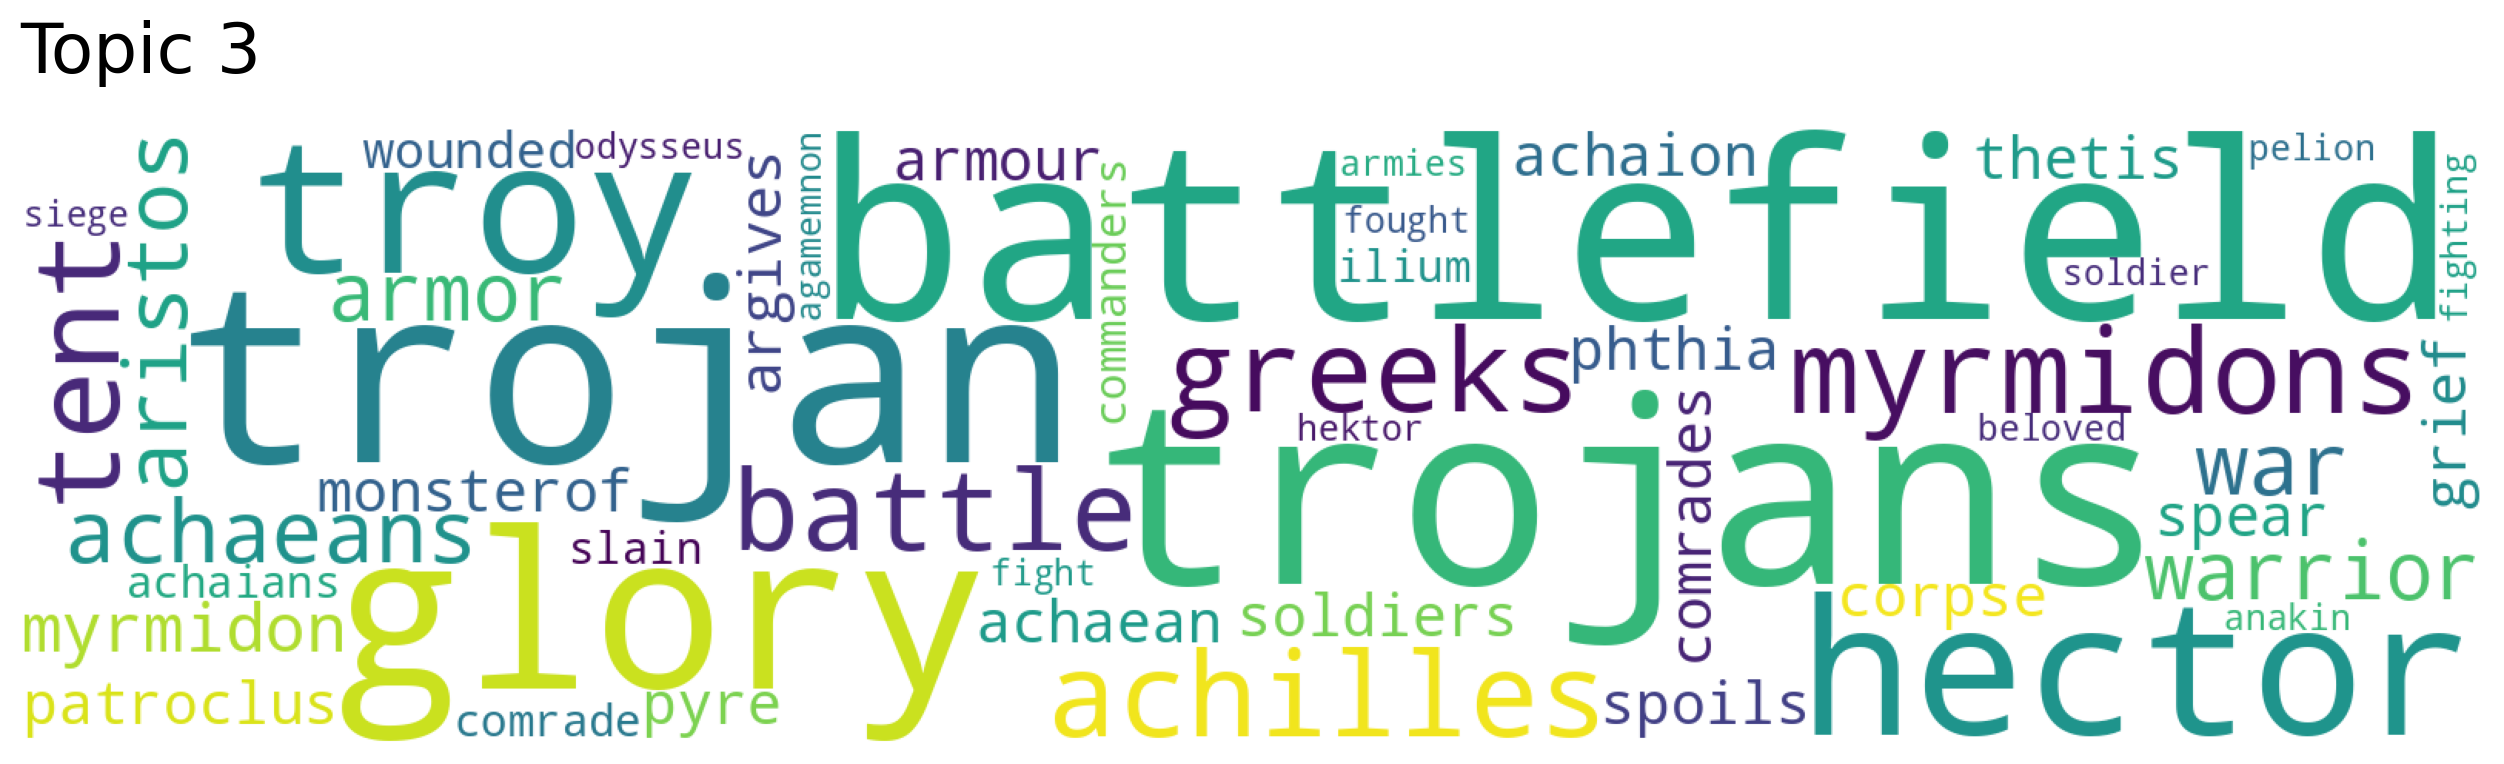

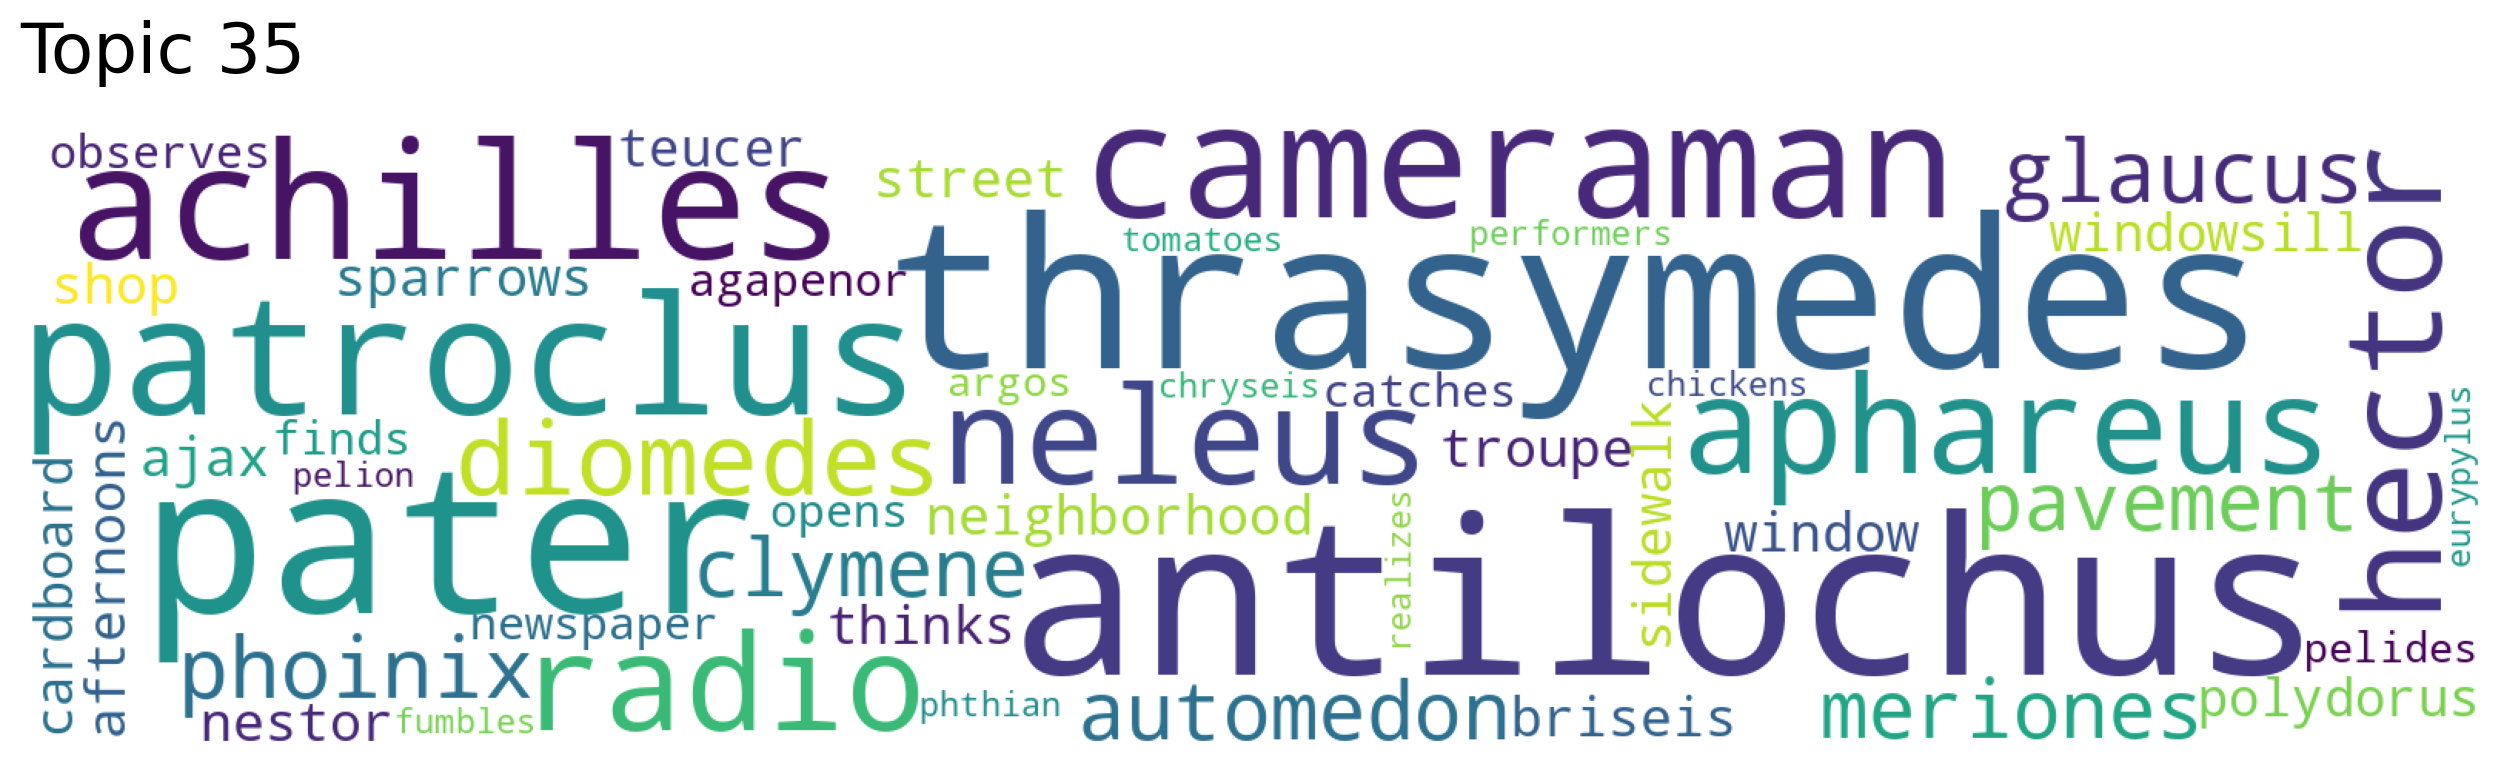

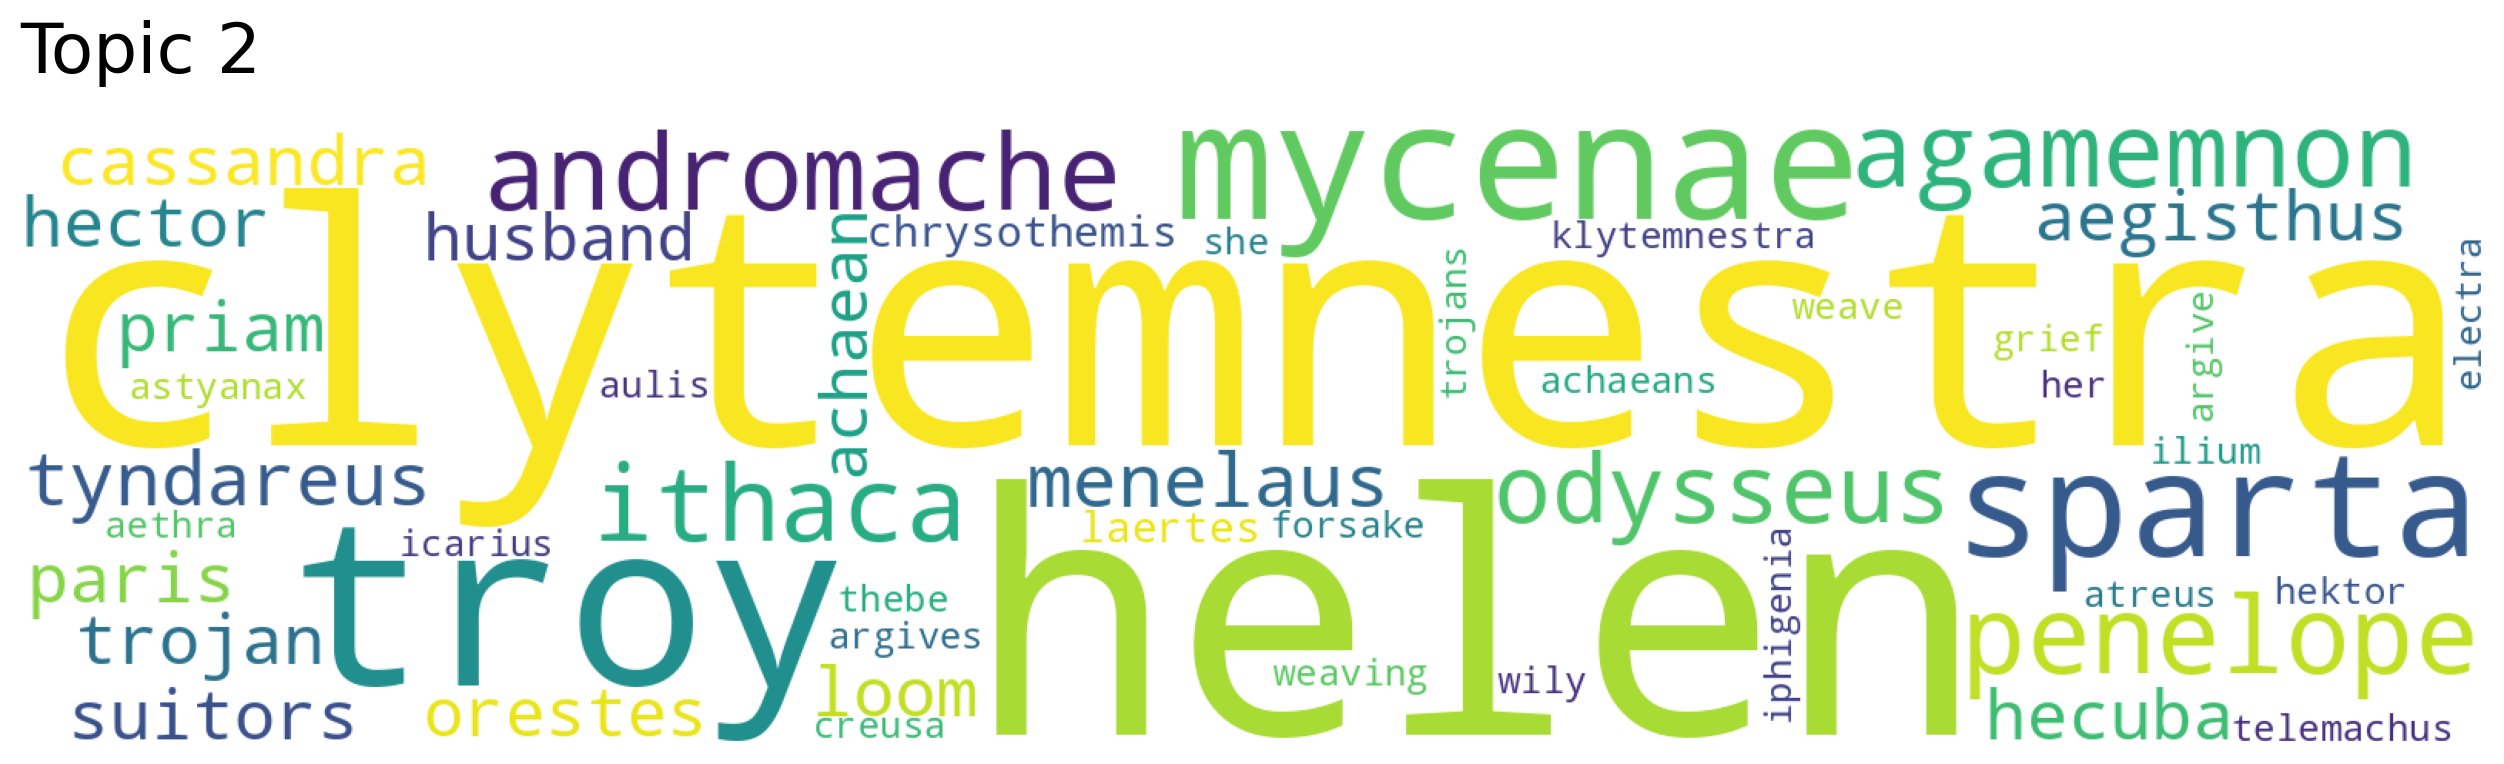

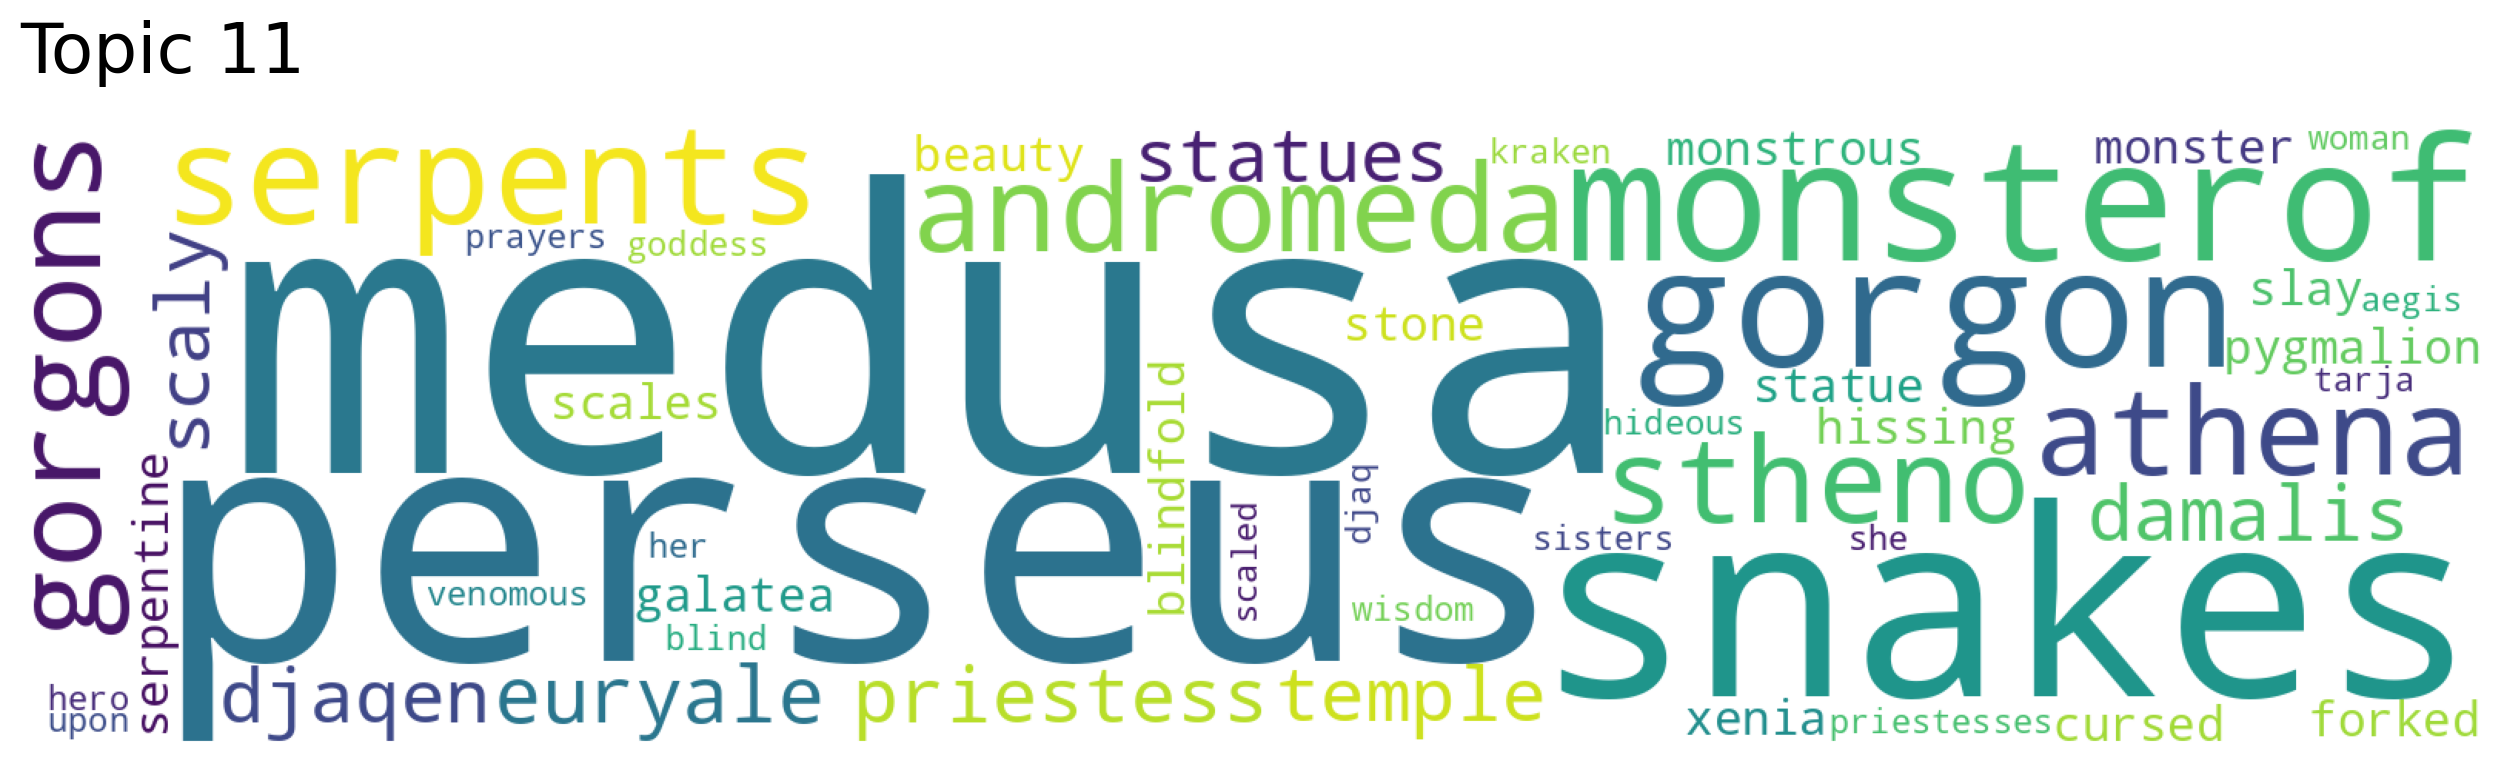

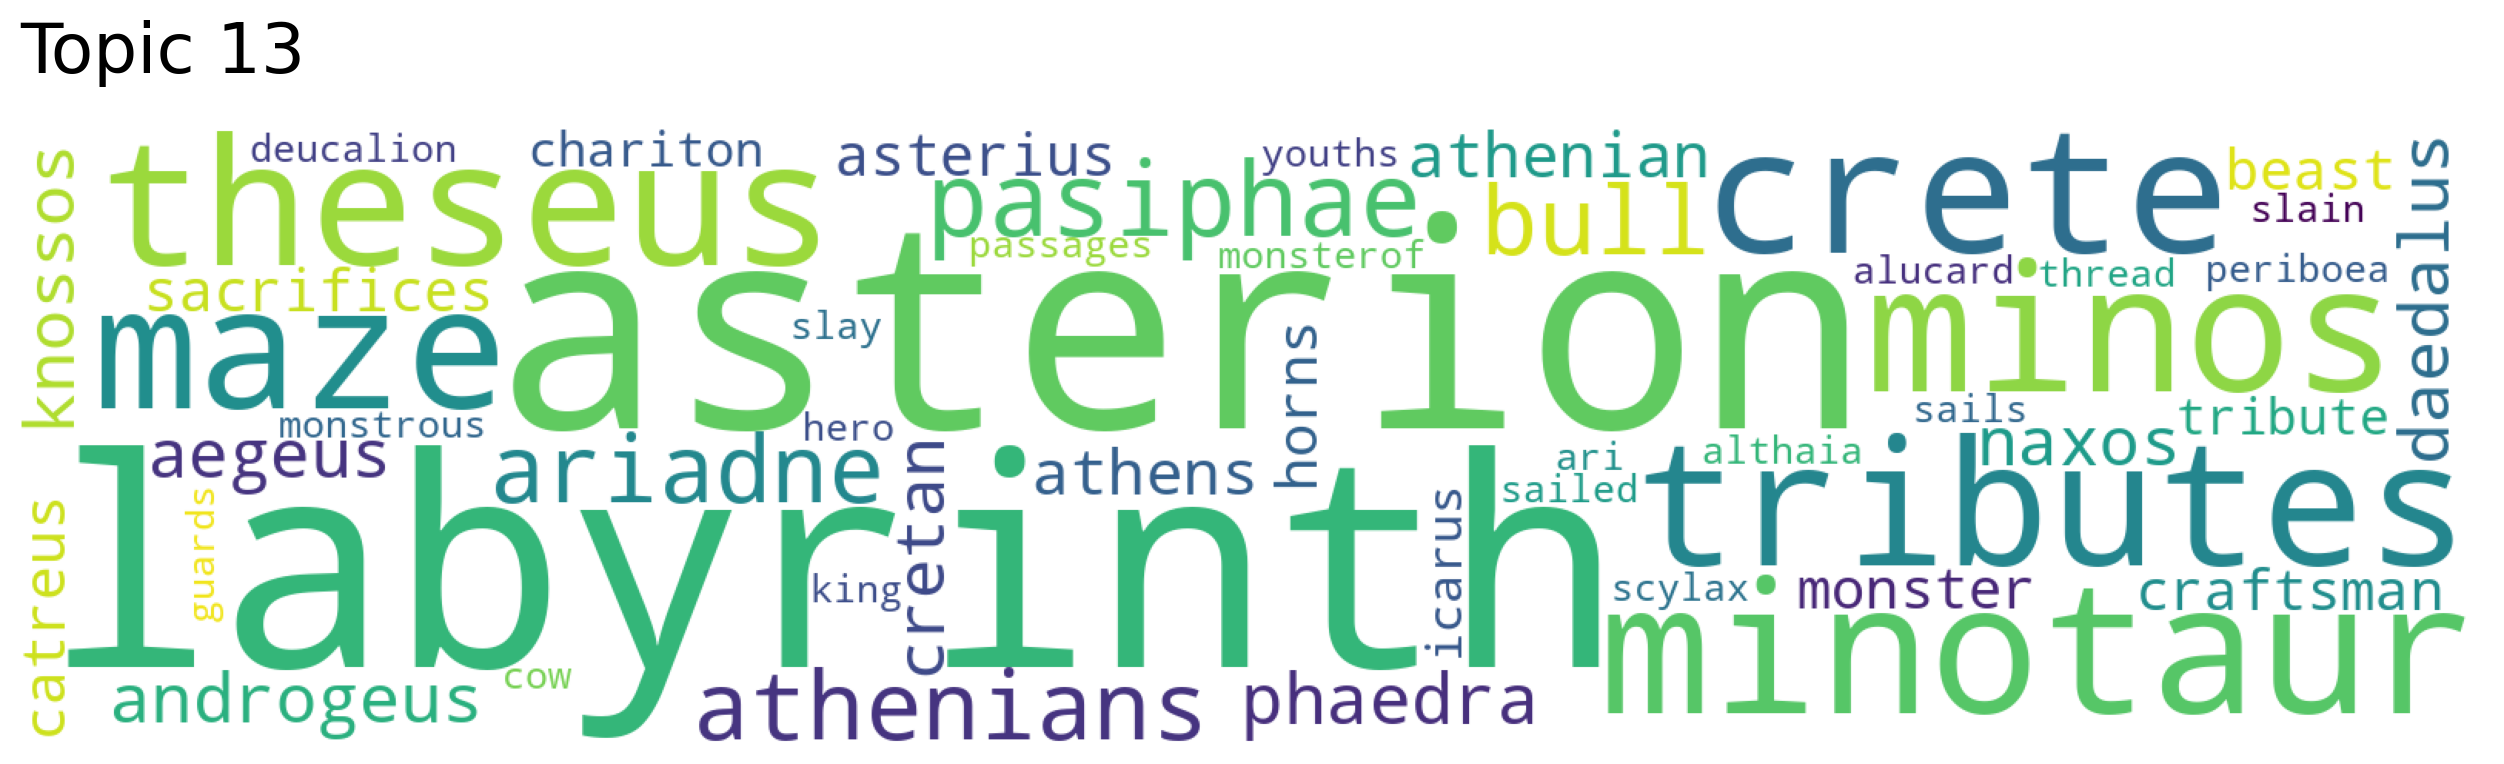

In [4]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["man"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic, background_color="white")